### Review of all supervised learning models using sciki-learn datasets

# PERCEPTRON

In [1]:
from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Caso esteja usando Jupyter Notebook ou JupyterLab
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

**Understanding the straight line generated by the perceptron**<br>
w1.x + w2.y + w0 = 0<br>
w2.y = - w1.x - w0<br>
y = (- w1.x - w0)/w2

In [3]:
data =  load_iris()
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

In [4]:
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


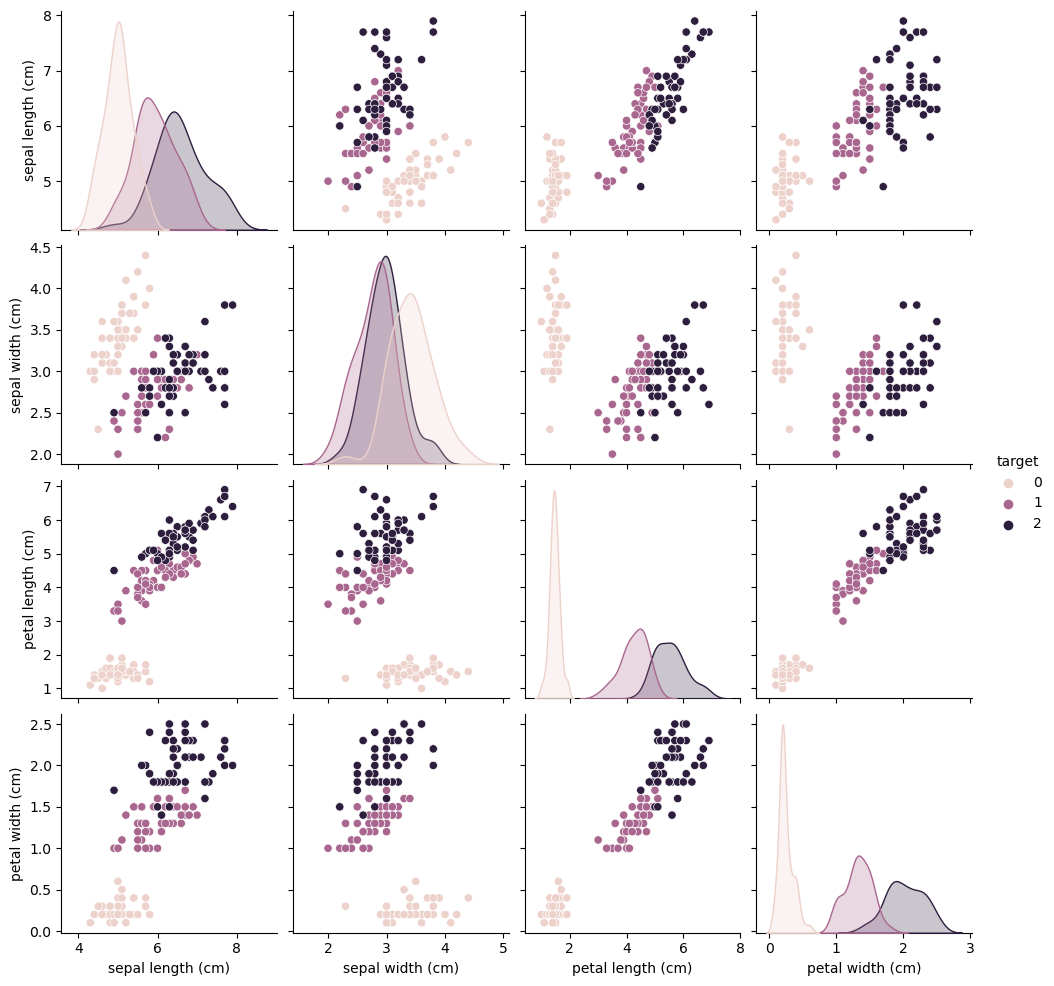

In [5]:
sns.pairplot(iris,hue='target');

In [6]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [7]:
iris_0_1 = iris.loc[iris.target.isin([0,1]),['petal length (cm)', 'petal width (cm)','target']]   #creating a classifier model using 2 columns and the 'target'. I only have selected 2 columns to make the model graphically visible

In [8]:
iris_0_1

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


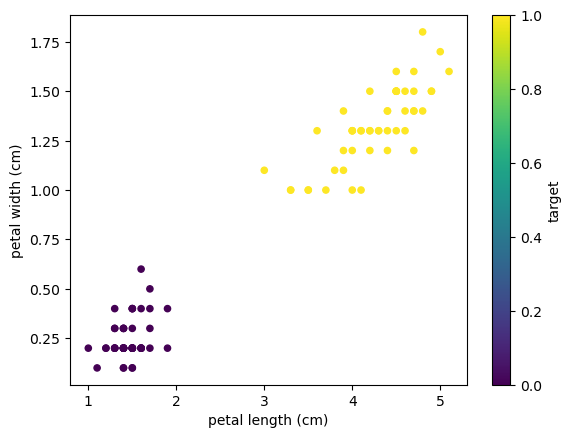

In [9]:

iris_0_1.plot.scatter(x='petal length (cm)',
                  y='petal width (cm)',
                  c='target',
                  colormap='viridis');
plt.show()

In [10]:

X = iris_0_1.drop('target',axis=1)
y = iris_0_1.target

In [11]:
display(X.head())
print()
y.value_counts()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


0    50
1    50
Name: target, dtype: int64

In [12]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
clf = Perceptron(tol=1e-3, random_state=42)

In [14]:
clf = clf.fit(X_train,y_train)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
confusion_matrix(y_test,y_pred)

array([[19,  0],
       [ 0, 14]], dtype=int64)

In [17]:
print(clf.coef_)
print(clf.intercept_)

[[1.4 1.9]]
[-5.]


In [18]:
print(clf.coef_[0][0])

1.4000000000000004


In [19]:
print(clf.intercept_[0])

-5.0


In [20]:
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
w0 = clf.intercept_[0]

x = np.arange(0,5) 
y = (-w1*x-w0)/w2

# X_TRAIN Graphic
w1.x + w2.y + w0 = 0<br>
w2.y = - w1.x - w0<br>
y = (- w1.x - w0)/w2


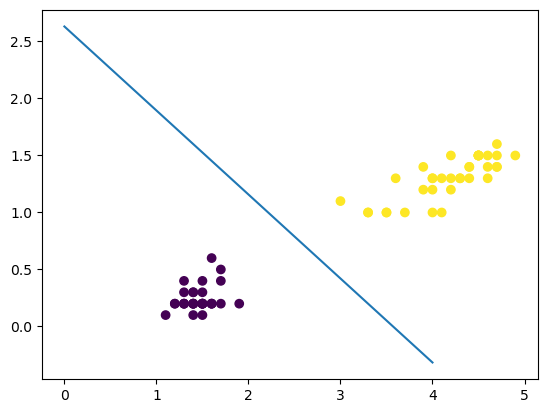

In [21]:

fig, ax = plt.subplots()

ax.scatter(x=X_train['petal length (cm)'],
                  y=X_train['petal width (cm)'],
                  c=y_train)
ax.plot(x,y)
plt.show()

# testing the adaptation of the model when I combine all the columns and targets

In [22]:
iris_all_columns = iris

In [23]:
iris_all_columns.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [24]:
X1 = iris_all_columns.drop('target',axis=1)
y1 = iris_all_columns.target

In [25]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [26]:
clf1 = Perceptron(tol=1e-3, random_state=42)
clf1 = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
coef1 = clf1.coef_
intercept1 = clf1.intercept_
confusion_matrix(y_test1,y_pred1)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  8,  8]], dtype=int64)

In [27]:
print('fist classifier',clf)
print('second classifier',coef1)

fist classifier Perceptron(random_state=42)
second classifier [[  2.    4.8  -7.7  -3.3]
 [ 14.3 -32.8  14.8 -24.1]
 [-29.2 -27.5  47.   39.8]]


array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  8,  8]], dtype=int64)

# It can be seen that when the base is not linearly separated in the targets, the perceptron has a decay in the confusion matrix, which indicates that the model is not suitable for a non-linearly separated base

# DESICIONS TREES A.I MODEL

In [28]:
iris_descion_trees = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

In [29]:
Xtress = iris_descion_trees.drop('target',axis=1)
ytress = iris_descion_trees.target

In [30]:
X_traintress, X_testtress, y_traintress, y_testtress = train_test_split(Xtress, ytress, test_size=0.33, random_state=42)

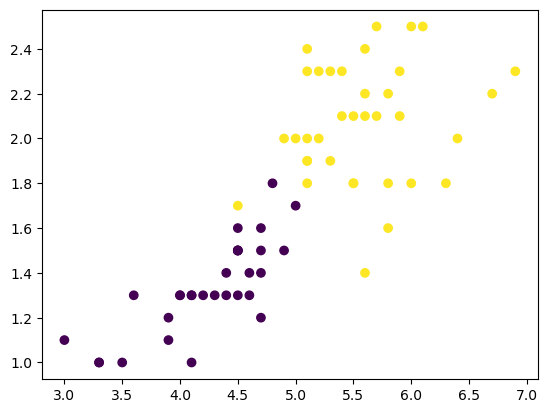

In [31]:
fig,ax = plt.subplots()
ax.scatter(X_traintress['petal length (cm)'],X_traintress['petal width (cm)'],c=y_traintress)

plt.show()

In [32]:
clftree = tree.DecisionTreeClassifier(random_state=0).fit(X_traintress,y_traintress)

In [33]:
clftree.score(X_traintress,y_traintress)

1.0

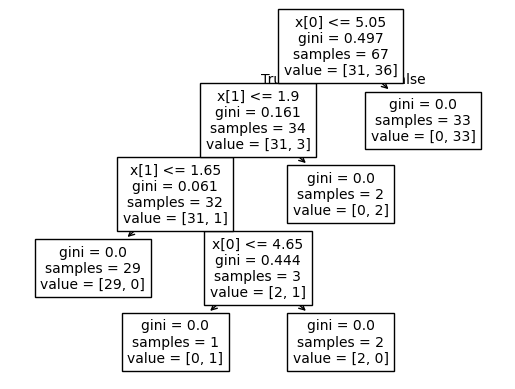

In [34]:
tree.plot_tree(clftree);

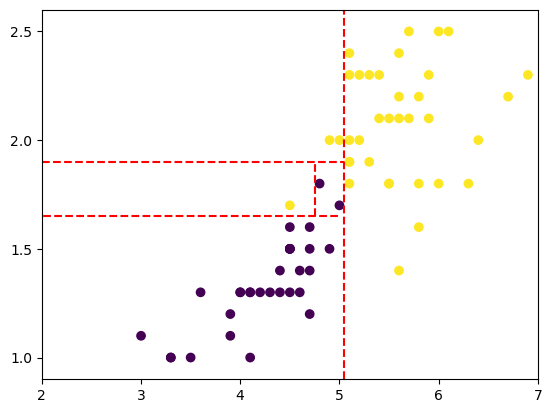

In [35]:
fig, ax = plt.subplots()
ax.scatter(X_traintress['petal length (cm)'], X_traintress['petal width (cm)'], c=y_traintress)


ax.set(xlim=(2, 7), xticks=[2, 3, 4, 5, 6, 7],
       ylim=(0.9, 2.6), yticks=[1, 1.5, 2, 2.5])


ax.plot([5.05, 5.05], [0.9, 2.6], '--r')  
ax.plot([2, 5.05], [1.9, 1.9], '--r')
ax.plot([0.9,5],[1.65,1.65],'--r')
ax.plot([4.75,4.75],[1.65,1.9],'--r')

plt.show()






In [36]:
y_pred_trees = clftree.predict(X_testtress)

confusion_matrix(y_testtress,y_pred_trees) # o modelo nao esta funcionando muito bem para os modelos de teste ou seja 
#Overfeeting

array([[18,  1],
       [ 6,  8]], dtype=int64)

In [37]:
y_pred_trees

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2])

In [38]:

iris_descion_trees1 = iris.loc[:,['petal length (cm)','petal width (cm)','target']]


Xtress = iris_descion_trees1.drop('target',axis=1)
ytress = iris_descion_trees1.target


X_traintress, X_testtress, y_traintress, y_testtress = train_test_split(Xtress, ytress, test_size=0.33, random_state=42)

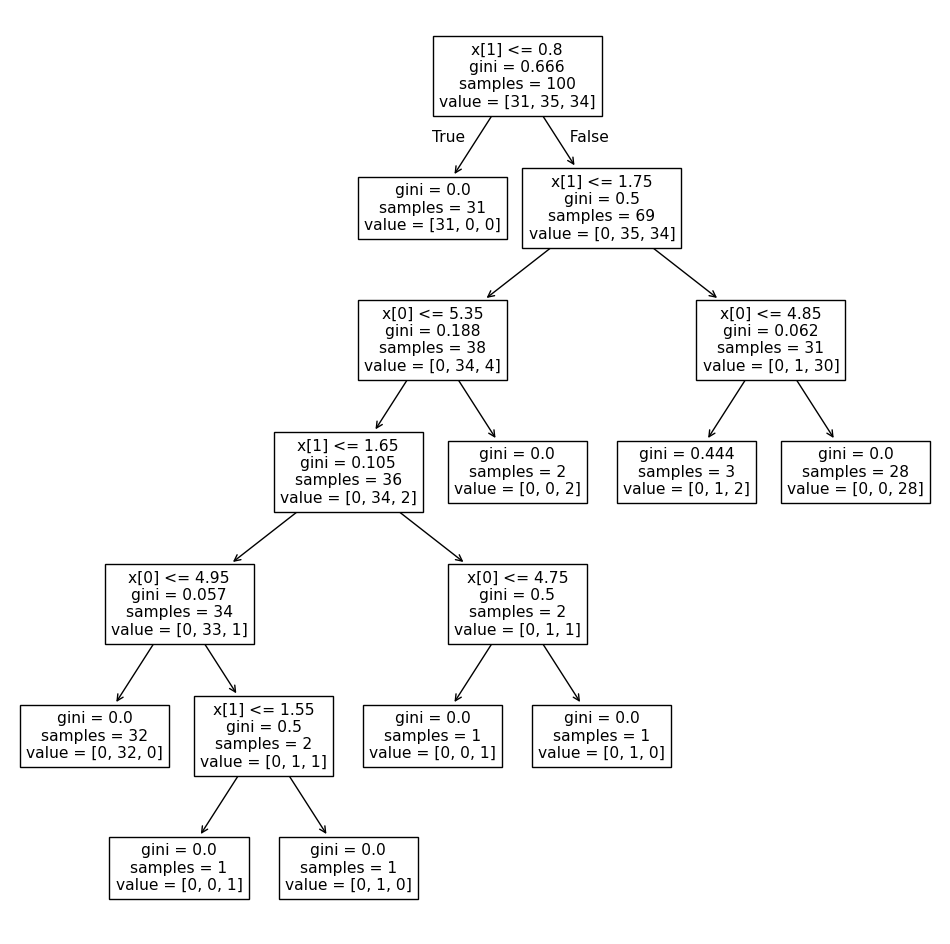

In [39]:

clftree = tree.DecisionTreeClassifier(random_state=0).fit(X_traintress,y_traintress)



y_pred_trees = clftree.predict(X_testtress)



fig,ax = plt.subplots(figsize=(12,12))

tree.plot_tree(clftree)

plt.show()

In [40]:
# verifying the gini index with math functions
P = 31/100 
P2 = 35/100 
P3 = 34/100

1-((P)**2+(P2)**2+(P3)**2) # This is the calculation for the first node of the Gini index and so on


0.6658

In [41]:
print(confusion_matrix(y_testtress,y_pred_trees)) # overfeeting

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


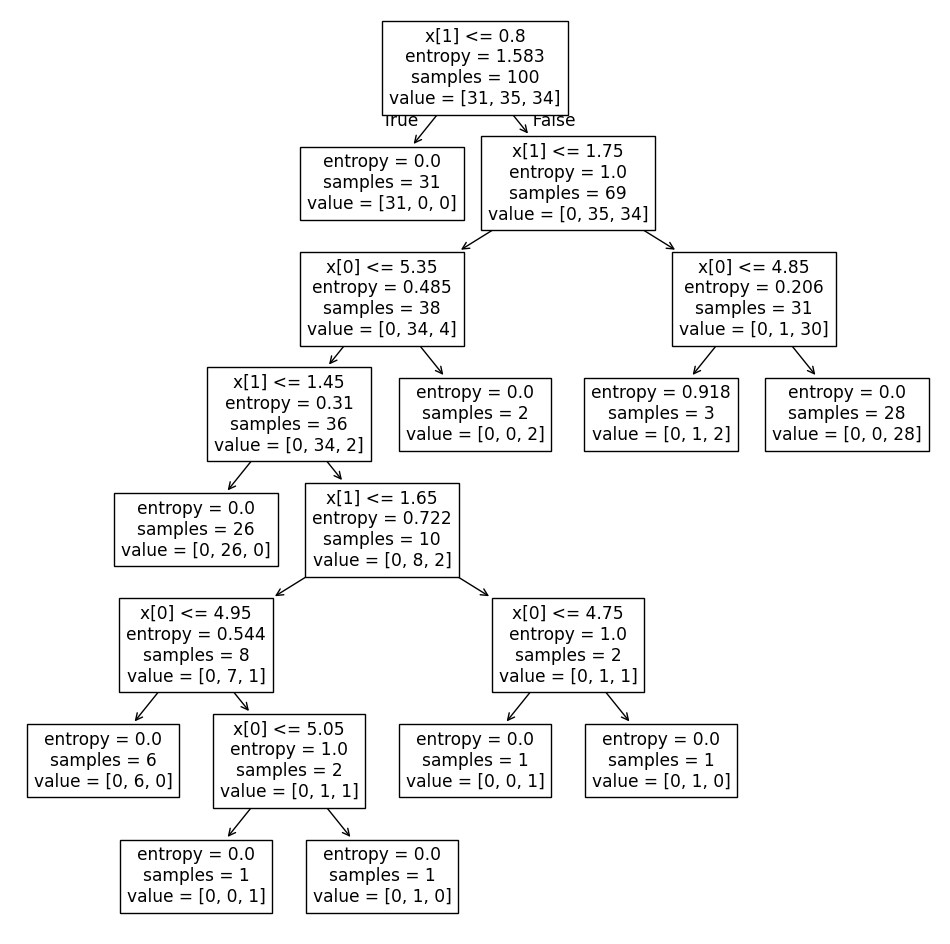

In [42]:

Xtress = iris_descion_trees1.drop('target',axis=1)
ytress = iris_descion_trees1.target


X_traintress, X_testtress, y_traintress, y_testtress = train_test_split(Xtress, ytress, test_size=0.33, random_state=42)

clftree = tree.DecisionTreeClassifier(random_state=0,criterion='entropy').fit(X_traintress,y_traintress)



y_pred_trees = clftree.predict(X_testtress)



fig,ax = plt.subplots(figsize=(12,12))

tree.plot_tree(clftree)

plt.show()

In [43]:
# entropy 
import math
P = 31/100 
P2 = 35/100 
P3 = 34/100

-((P)*math.log2(P)+(P2)*math.log2(P2)+(P3)*math.log2(P3)) # Here is the formula to calculate the entropy of the data for each decision in the model.

1.5830689115989398

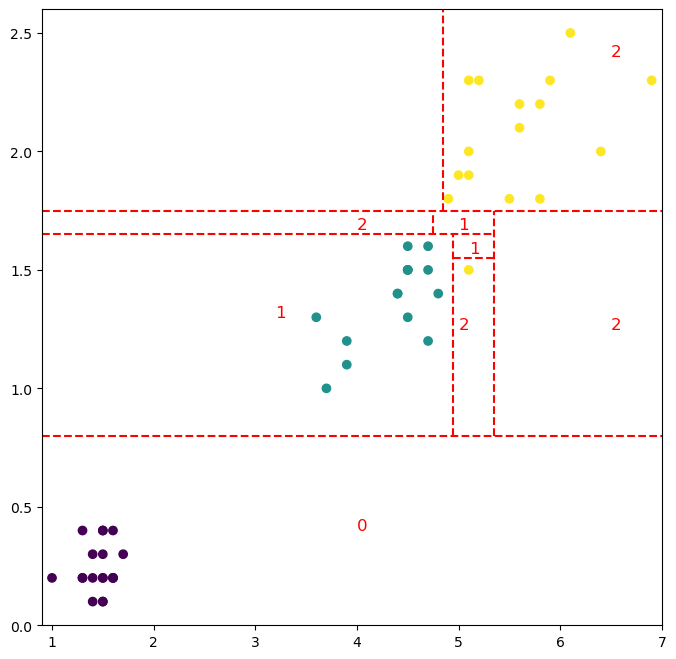

In [44]:
#width x length
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=X_testtress['petal length (cm)'],
           y=X_testtress['petal width (cm)'],
           c=y_testtress,
           cmap='viridis')


ax.plot([0.9,7],[0.8,0.8],'--r')
ax.plot([0.9,7],[1.75,1.75],'--r')
ax.plot([4.85,4.85],[1.75,2.6],'--r')
ax.plot([5.35,5.35],[0.8,1.75],'--r')
ax.plot([0.9,5.35],[1.65,1.65],'--r')
ax.plot([4.75,4.75],[1.65,1.75],'--r')
ax.plot([4.95,4.95],[0.8,1.65],'--r')
ax.plot([4.95,5.35],[1.55,1.55],'--r')

ax.annotate(0,(4,0.4),c='r',fontsize=12)
ax.annotate(2,(6.5,2.4),c='r',fontsize=12)
ax.annotate(2,(6.5,1.25),c='r',fontsize=12)
ax.annotate(1,(5,1.67),c='r',fontsize=12)
ax.annotate(2,(4,1.67),c='r',fontsize=12)
ax.annotate(1,(3.2,1.3),c='r',fontsize=12)
ax.annotate(1,(5.1,1.57),c='r',fontsize=12)
ax.annotate(2,(5,1.25),c='r',fontsize=12)

ax.set(xlim=(0.9, 7), xticks=[1,2,3,4,5,6,7],
       ylim=(0, 2.6), yticks=[0,0.5,1,1.5,2,2.5])

plt.show()

### To prevent the overfeeting of the model we should use the function MAX_DEPTH

In [45]:

Xtress = iris_descion_trees1.drop('target',axis=1)
ytress = iris_descion_trees1.target


X_traintress, X_testtress, y_traintress, y_testtress = train_test_split(Xtress, ytress, test_size=0.33, random_state=42)


clftree = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=3).fit(X_traintress,y_traintress)



y_pred_trees = clftree.predict(X_testtress)

In [46]:
metrics.accuracy_score(y_testtress,y_pred_trees)

0.98

# Linear Regression

In [47]:
houses = fetch_california_housing()

In [48]:
houses_df =  pd.DataFrame(houses.data)

In [49]:
houses_df.head(3)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [50]:
houses_df.columns =  houses.feature_names

In [51]:
houses_df['MedHouseValue'] =  houses.target

In [52]:
XLR = houses_df['MedInc']
yLR = houses_df['MedHouseValue']

X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(XLR, yLR, test_size=0.33, random_state=42)

In [53]:
# To use simple linear regression, we shouldn't use all of the columns
Reg = LinearRegression().fit(X_trainLR.values.reshape(-1,1), y_trainLR)

In [54]:
yLR_pred = Reg.predict(X_testLR.values.reshape(-1,1))

In [55]:
print(type(Reg))
Reg.score(X_trainLR.values.reshape(-1,1), y_trainLR)

<class 'sklearn.linear_model._base.LinearRegression'>


0.4738509942209922

In [56]:
mae = mean_absolute_error(y_testLR, yLR_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.6265986453094173


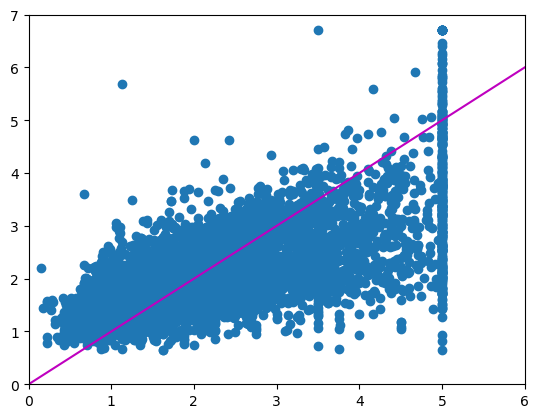

In [57]:
fig,ax = plt.subplots()
ax.scatter(y_testLR,yLR_pred)
ax.plot([0,6],[0,6],'m')
ax.set(xlim=(0,6),ylim=(0,7))
plt.show()

# Multiple Linear Regression model

In [58]:
XLR2 = houses_df.drop('MedHouseValue',axis=1)
yLR2 = houses_df['MedHouseValue']

X_trainLR2, X_testLR2, y_trainLR2, y_testLR2 = train_test_split(XLR2, yLR2, test_size=0.33, random_state=42)
# To use simple linear regression, we shouldn't use all of the columns
Reg2 = LinearRegression().fit(X_trainLR2, y_trainLR2)

In [59]:
yLR_pred2 = Reg2.predict(X_testLR2)

In [60]:
# Determining the slope
print(Reg2.coef_)
# Determining the linear coefficient
print(Reg2.intercept_)

[ 4.44870466e-01  9.55004561e-03 -1.21991503e-01  7.79144696e-01
 -7.68990810e-08 -3.29948505e-03 -4.19131153e-01 -4.34103468e-01]
-37.08201093907989


In [61]:
mae2 = mean_absolute_error(y_testLR2, yLR_pred2)
print("Mean Absolute Error:", mae2)

Mean Absolute Error: 0.5295710106684445


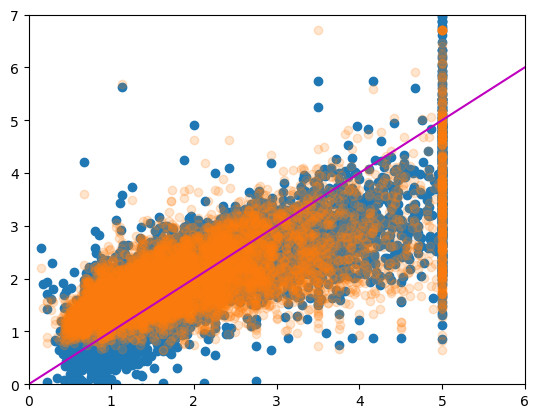

In [62]:
fig,ax = plt.subplots()
ax.scatter(y_testLR2,yLR_pred2)
ax.scatter(y_testLR,yLR_pred,alpha=0.2)
ax.plot([0,6],[0,6],'m')
ax.set(xlim=(0,6),ylim=(0,7))
plt.show()

# K-nearest neighbor (KNN) AI model.

In [63]:
data = load_iris()
irisk = pd.DataFrame(data.data,columns=data.feature_names)
irisk['target'] =  data.target

In [64]:
irisk.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [65]:
irisk = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

In [66]:
Xk = irisk.drop('target',axis=1)
yk = irisk.target

In [67]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(Xk, yk, test_size=0.33, random_state=42)

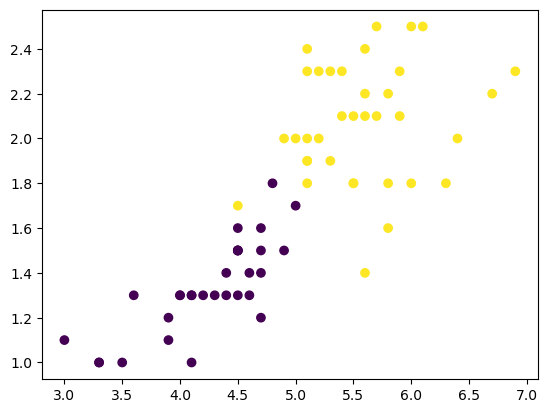

In [68]:
fig,ax = plt.subplots()
ax.scatter(X_trainK['petal length (cm)'],X_trainK['petal width (cm)'],c=y_trainK);

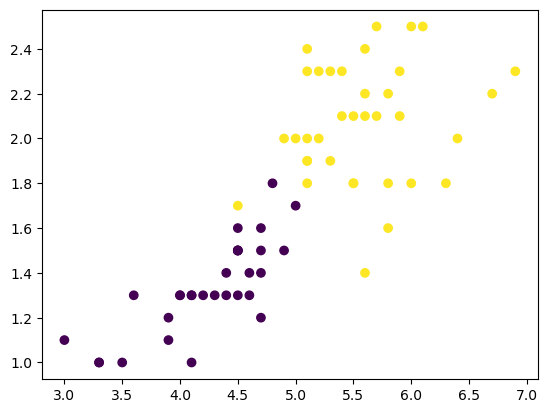

In [69]:
fig,ax = plt.subplots()
ax.scatter(X_trainK['petal length (cm)'],X_trainK['petal width (cm)'],c=y_trainK);

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# KNN

clfK = KNeighborsClassifier(n_neighbors=2).fit(X_trainK, y_trainK)

# fit 
y_predK = clfK.predict(X_testK)


In [71]:
confusion_matrix(y_testK, y_predK)

array([[19,  0],
       [ 6,  8]], dtype=int64)

# Logistic Regression for classification models.

In [72]:
X,y = load_iris(return_X_y=True,as_frame=True)

In [73]:
X1 = X.loc[y.isin([0,1]),'petal width (cm)']
y1 = y[y.isin([0,1])]

In [74]:
clfLogistic = LogisticRegression(random_state=0).fit(X1.values.reshape(-1,1),y1)

In [75]:
clfLogistic.coef_

array([[4.42403177]])

In [76]:
clfLogistic.intercept_

array([-3.37992548])

In [77]:
import scipy
from scipy.special import expit

In [78]:
array_x  = np.linspace(0,2,100)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.33,random_state=42)

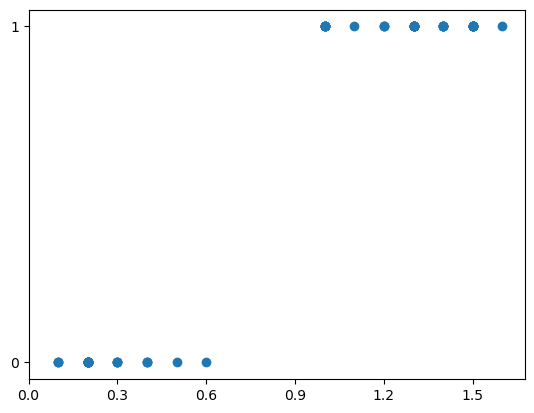

In [80]:
# Visualizando graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
#ax.plot(array_x,y_train)
ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [81]:
clf = LogisticRegression(random_state=0).fit(X_train.values.reshape(-1, 1), y_train)

In [82]:
from scipy.special import expit
array_x = np.linspace(0,2,100)
y = expit(w1*array_x+w0)

In [83]:
# Verificando o coeficiente angular
w1 = clf.coef_[0][0]


# E o coeficiente linear
w0 = clf.intercept_[0]


#y = expit(w1*array_x+w0) my S in the formula would be the y that I declared
# what if I want to know the value when x = 0.3?
expit(w1*0.4+w0)

0.21544737777346779

In [84]:
clf.predict_proba(X_train.values.reshape(-1,1))[0:5]

array([[0.88722677, 0.11277323],
       [0.26530467, 0.73469533],
       [0.78455262, 0.21544738],
       [0.05000239, 0.94999761],
       [0.07180909, 0.92819091]])

In [85]:
y_pred_proba = clf.predict_proba(X_train.values.reshape(-1,1))
y_pred_proba[:,1]

array([0.11277323, 0.73469533, 0.21544738, 0.94999761, 0.92819091,
       0.11277323, 0.21544738, 0.11277323, 0.11277323, 0.11277323,
       0.85679257, 0.11277323, 0.15741893, 0.73469533, 0.11277323,
       0.73469533, 0.07959343, 0.11277323, 0.11277323, 0.15741893,
       0.11277323, 0.11277323, 0.94999761, 0.15741893, 0.89789616,
       0.11277323, 0.89789616, 0.96542879, 0.89789616, 0.94999761,
       0.37236779, 0.92819091, 0.73469533, 0.11277323, 0.94999761,
       0.94999761, 0.89789616, 0.73469533, 0.15741893, 0.89789616,
       0.11277323, 0.8027766 , 0.73469533, 0.92819091, 0.07959343,
       0.89789616, 0.92819091, 0.92819091, 0.94999761, 0.07959343,
       0.11277323, 0.11277323, 0.94999761, 0.21544738, 0.11277323,
       0.28756605, 0.89789616, 0.92819091, 0.89789616, 0.94999761,
       0.85679257, 0.11277323, 0.73469533, 0.89789616, 0.11277323,
       0.85679257, 0.94999761])

In [86]:
y_pred = clf.predict(X_train.values.reshape(-1,1))

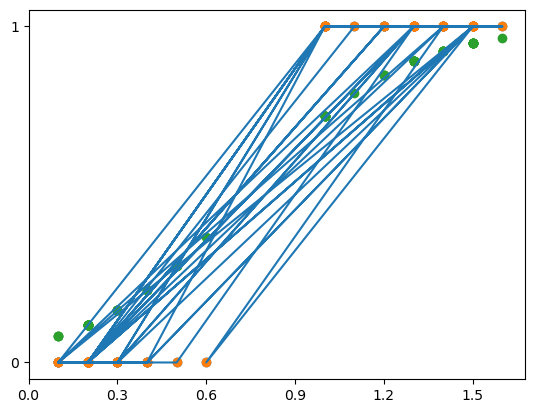

In [87]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.scatter(X_train,y_pred)
ax.plot(X_train,y_pred)
ax.scatter(X_train,y_pred_proba[:,1])

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [88]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)

In [89]:
X1 = X.loc[y.isin([0,1]),'petal width (cm)']
y1 = y[y.isin([0,1])]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.33,random_state=42)

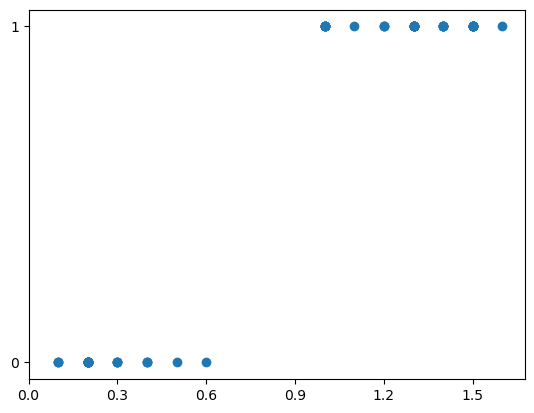

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [92]:
clf = LogisticRegression(random_state=0).fit(X_train.values.reshape(-1, 1), y_train)

In [93]:
# Checking the slope
w1 = clf.coef_[0][0]

In [94]:
# And the linear coefficient
w0 = clf.intercept_[0]

- To plot this graph, we already have the scipy `expit` function
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
    - `expit(x) = 1/(1+exp(-x))`

In [95]:
#xpit
from scipy.special import expit

In [96]:
array_x = np.linspace(0,2,100)

In [97]:
# Calculating the value for each value of y
y = expit(w1*array_x+w0)

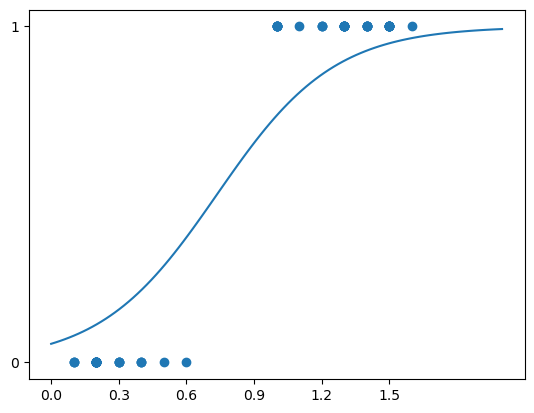

In [98]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(array_x,y)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

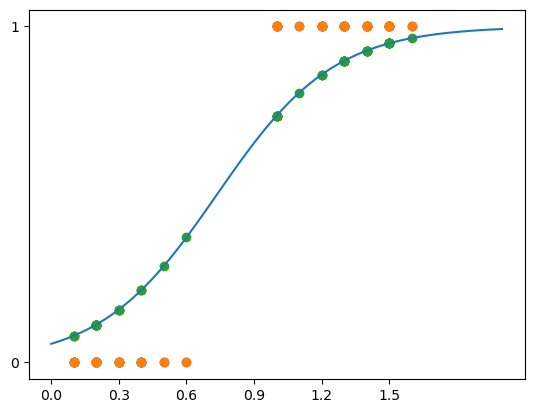

In [99]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(array_x,y)
ax.scatter(X_train,y_pred)
ax.scatter(X_train,y_pred_proba[:,1])

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

# SVM SUPPORT VECTOR MACHINE

In [100]:
X,y = load_iris(return_X_y=True,as_frame=True)

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [102]:
clfSVM = SVC().fit(X_train,y_train)

In [103]:
y_predSVC = clfSVM.predict(X_test)

In [104]:
confusion_matrix(y_test,y_predSVC)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)